# Visual Analysis I-94 traffic Data 

The objective of this project is to analyze traffic data at a point in the I-94 for west bound traffic to identify trends regarding the traffic volume, the effect of months, days and hours. We will then seek to establish correlation between weather conditions and traffic. 



In [119]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## About the Data: 
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume from 2012-2018. Credit to John Hogue. 

In [64]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


From the dataset documentation:

| Label                | Description                                                    |
| -------------------- | -------------------------------------------------------------- |
| holiday              |  Categorical US National holidays plus regional holiday        |
| temp                 |  Numeric Average temp in kelvin                                |
| rain\_1h             |  Numeric Amount in mm of rain that occurred in the hour        |
| snow\_1h             |  Numeric Amount in mm of snow that occurred in the hour        |
| clouds\_all          |  Numeric Percentage of cloud cover                             |
| weather\_main        |  Categorical Short textual description of the current weather  |
| weather\_description |  Categorical Longer textual description of the current weather |
| date\_time           |  DateTime Hour of the data collected in local CST time         |
| traffic\_volume      |  Numeric Hourly I-94 ATR 301 reported westbound traffic volume |

In [65]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Based on `info()`, date needs conversion but the rest are in the needed format.

## Visualizations for analysis 

Histogram for `traffic_volume`

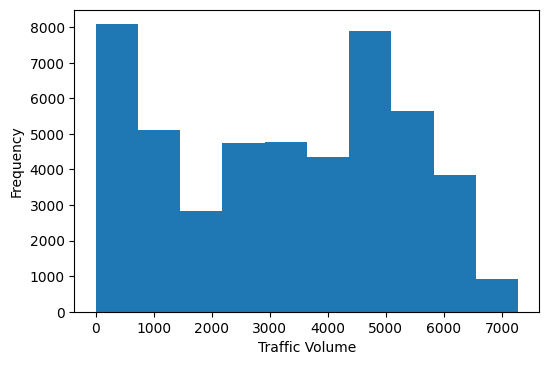

In [66]:
traffic['traffic_volume'].plot.hist()
plt.xlabel("Traffic Volume")
plt.show()

In [67]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Minimum traffic of zero is possible because of potential construction projects  rerouting traffic, stormy weather or even statistically during early morning hours. 

Dividing dataset into night-time (20:00-7:00) data and daytime(8:00-19:00) data:

In [68]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [69]:
traffic_day = traffic[traffic.loc[:,"date_time"].dt.hour.between(8,19)]
traffic_night = traffic[~(traffic.loc[:,"date_time"].dt.hour.between(8,19))]

assert (traffic.shape[0] == traffic_night.shape[0]+traffic_day.shape[0]), "Missing some rows due to boolean indexing"

Plotting histograms for both in a grid

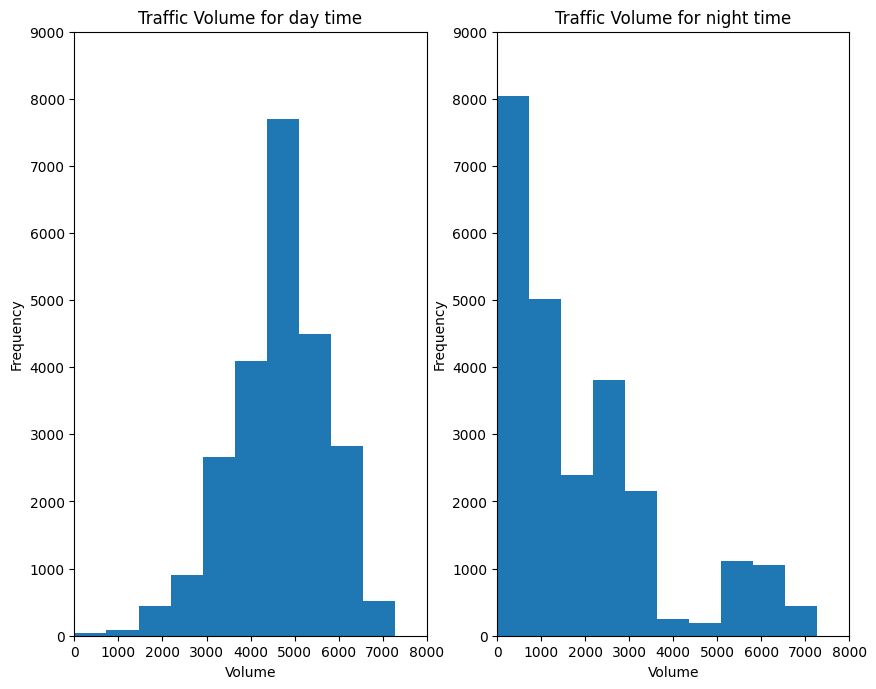

In [81]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
traffic_day['traffic_volume'].plot.hist()
plt.title("Traffic Volume for day time")
plt.xlabel("Volume")
plt.ylim(0, 9000)
plt.xlim(0, 8000)

plt.subplot(1,2,2)
traffic_night['traffic_volume'].plot.hist()
plt.title("Traffic Volume for night time")
plt.xlabel("Volume")
plt.ylim(0, 9000)
plt.xlim(0, 8000)

plt.show()

Given the interest in identifying heavy traffic, we will only be working with the truncated daytime dataset. 

In [87]:
traffic_day.loc[:,'month'] = traffic_day.loc[:,'date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month.loc[:,'traffic_volume']

month
1     4379.382785
2     4577.445087
3     4755.891671
4     4742.272508
5     4769.600454
6     4787.214477
7     4494.121650
8     4799.611891
9     4745.968382
10    4812.563146
11    4574.138274
12    4313.228426
Name: traffic_volume, dtype: float64

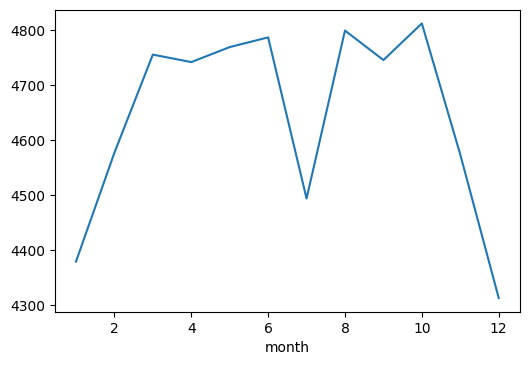

In [101]:
by_month.loc[:,'traffic_volume'].plot.line()
plt.show()

In [94]:
traffic_day.loc[:,'dayofweek'] = traffic_day.loc[:,'date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek.loc[:,'traffic_volume']

dayofweek
0    4654.143222
1    4949.945727
2    5058.010219
3    5075.290639
4    5085.229148
5    4056.587118
6    3606.582789
Name: traffic_volume, dtype: float64

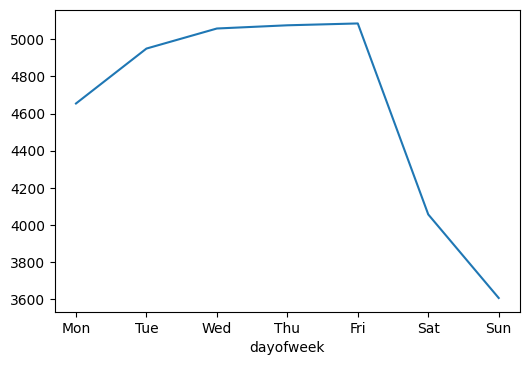

In [102]:
by_dayofweek.loc[:,'traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Mon", 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [103]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
bussiness_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-103-c2765c5ddc80>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



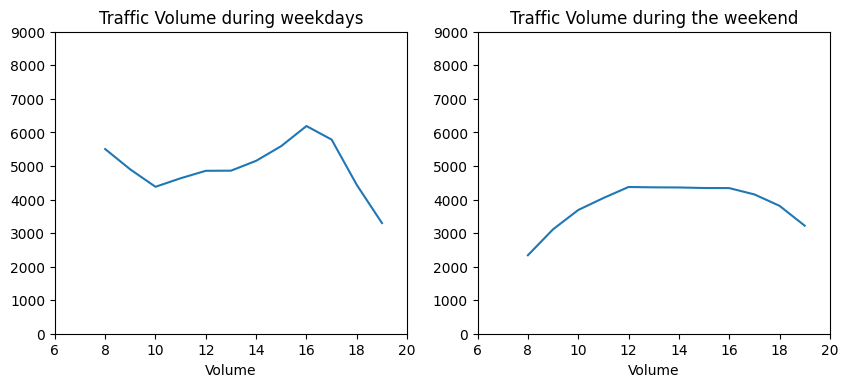

In [112]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Traffic Volume during weekdays")
plt.xlabel("Volume")
plt.ylim(0, 9000)
plt.xlim(6, 20)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Traffic Volume during the weekend")
plt.xlabel("Volume")
plt.ylim(0, 9000)
plt.xlim(6, 20)

plt.show()

The busiest hours during the weekdays are the evening rush hours while during the weekend it peaks at noon. 

In [118]:
traffic_day.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.010519,-0.019889,-0.156597,0.133283,0.216917,0.002207,0.129902
rain_1h,0.010519,1.000000,-0.000086,0.004875,0.005001,0.001162,-0.009854,0.006581
snow_1h,-0.019889,-0.000086,1.000000,0.027333,0.005186,0.026034,-0.008344,-0.003596
clouds_all,-0.156597,0.004875,0.027333,1.000000,-0.037828,0.000447,-0.044472,0.008198
traffic_volume,0.133283,0.005001,0.005186,-0.037828,1.000000,-0.012350,-0.324395,0.004045
month,0.216917,0.001162,0.026034,0.000447,-0.012350,1.000000,0.013141,0.001215
dayofweek,0.002207,-0.009854,-0.008344,-0.044472,-0.324395,0.013141,1.000000,-0.001457
hour,0.129902,0.006581,-0.003596,0.008198,0.004045,0.001215,-0.001457,1.000000


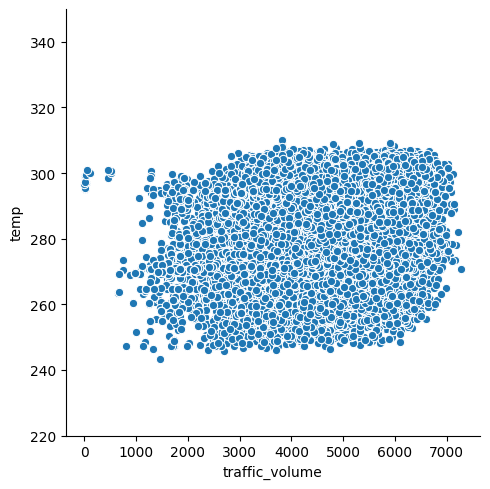

In [123]:
sns.relplot(data=traffic_day, x="traffic_volume", y="temp")
plt.ylim(220, 350)
plt.show()

In [124]:
traffic_day["weather_main"].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

None of the correlations are a reliable indicator of the traffic. 